# Problem Description

This project develops a predictive model for house prices using machine learning techniques. Through exploratory data analysis, feature engineering, and advanced modeling, it provides accurate price predictions and actionable insights to guide real estate decisions.

# Project Instructions

**1. Data Loading and Initial Exploration**
* Load the dataset into a DataFrame.
* Perform basic data exploration:
* Check dataset info, missing values, and statistical summaries

**2. Data Preprocessing**
* Fix column formats
* Handle Outliers and Missing Values
* Add Binary Features

**3. Filter and Clean Data**
* Filter the dataset to include only houses priced below $3 million
* Verify the dataset size after filtering

**4. EDA**
* Analyze pirce distribution
* Examine Relationships Between Features and Price

**5. Feature Engineering**
* Create New Features
* Normalize Key Features
* Neighborhood Clustering

**6. Prepare Data for Modeling**
* Split the dataset into training (80%) and testing (20%) sets
* Define the target variable (price) and predictors based on EDA and feature engineering

**7. Model Training and Evaluation**
* Baseline Model - Linear Regression
* Advanced Model like  Random Forest and Gradient Boosting models

**8. Hyperparameter Tuning**
* Optimize the Random Forest model using GridSearchCV
* Identify the best hyperparameters and evaluate the tuned model on the test set.

**9 Final Evaluation and Insights**
* Evaluate the final Random Forest model
* Document Key Findings


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

In [2]:
# 1. Checking data types and basic summary
print("Dataset Information:")
data.info()
print("\n")

# 2. Checking for missing values
print("Missing Values per Column:")
print(data.isnull().sum())
print("\n")

# 3. Basic statistics for numerical columns
print("Basic Statistical Summary:")
print(data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null

In [3]:
# Fixing the date format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')

# Handling extreme values in bedrooms and bathrooms
# Replacing extreme values in bedrooms with NaN (e.g., >10 bedrooms)
data['bedrooms'] = data['bedrooms'].apply(lambda x: x if 1 <= x <= 10 else None)

# Bathrooms: Set unrealistic values (e.g., 0 bathrooms) to NaN
data['bathrooms'] = data['bathrooms'].apply(lambda x: x if x > 0 else None)

# Transforming 'yr_renovated' into a binary feature
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns=['yr_renovated'], inplace=True)

# Converting 'waterfront' to categorical
data['waterfront'] = data['waterfront'].astype('category')

# Converting 'zipcode' to categorical
data['zipcode'] = data['zipcode'].astype('category')

# Adding a binary indicator for basement presence
data['has_basement'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# Filtering the dataset to include only homes priced below $3 million
data = data[data['price'] <= 3000000]

# Verifying the updated dataset by checking the maximum price
print("Maximum price after filtering:", data['price'].max())

# Checking the new size of the dataset
print("Number of rows after filtering:", len(data))

# Verifying the changes
data.head()

Maximum price after filtering: 3000000.0
Number of rows after filtering: 21568


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,has_basement
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,98136,47.5208,-122.393,1360,5000,0,1
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,98074,47.6168,-122.045,1800,7503,0,0


In [4]:
data.info()
# Dropping rows with missing values in 'bedrooms' and 'bathrooms'
data.dropna(subset=['bedrooms', 'bathrooms'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 21568 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21568 non-null  int64         
 1   date           21568 non-null  datetime64[ns]
 2   price          21568 non-null  float64       
 3   bedrooms       21553 non-null  float64       
 4   bathrooms      21558 non-null  float64       
 5   sqft_living    21568 non-null  int64         
 6   sqft_lot       21568 non-null  int64         
 7   floors         21568 non-null  float64       
 8   waterfront     21568 non-null  category      
 9   view           21568 non-null  int64         
 10  condition      21568 non-null  int64         
 11  grade          21568 non-null  int64         
 12  sqft_above     21568 non-null  int64         
 13  sqft_basement  21568 non-null  int64         
 14  yr_built       21568 non-null  int64         
 15  zipcode        21568 non

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


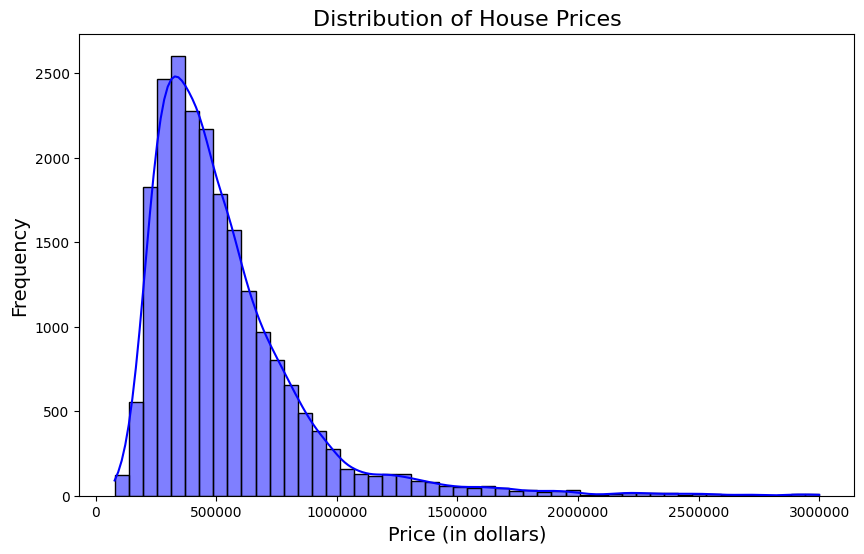

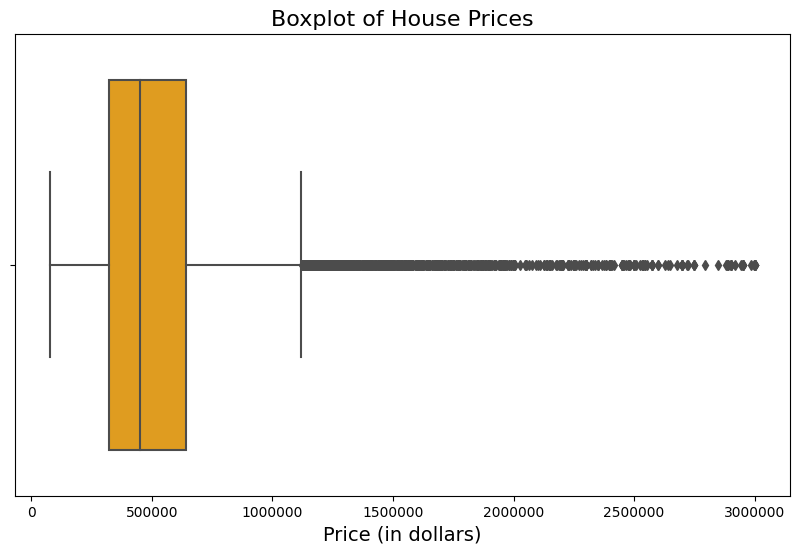

In [5]:
# Visualizing the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=50, color='blue')
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price (in dollars)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ticklabel_format(style='plain', axis='x')  # Ensures no scientific notation on the x-axis
plt.show()

# Boxplot to identify outliers in house prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'], color='orange')
plt.title('Boxplot of House Prices', fontsize=16)
plt.xlabel('Price (in dollars)', fontsize=14)
plt.ticklabel_format(style='plain', axis='x')  # Ensures no scientific notation on the x-axis
plt.show()

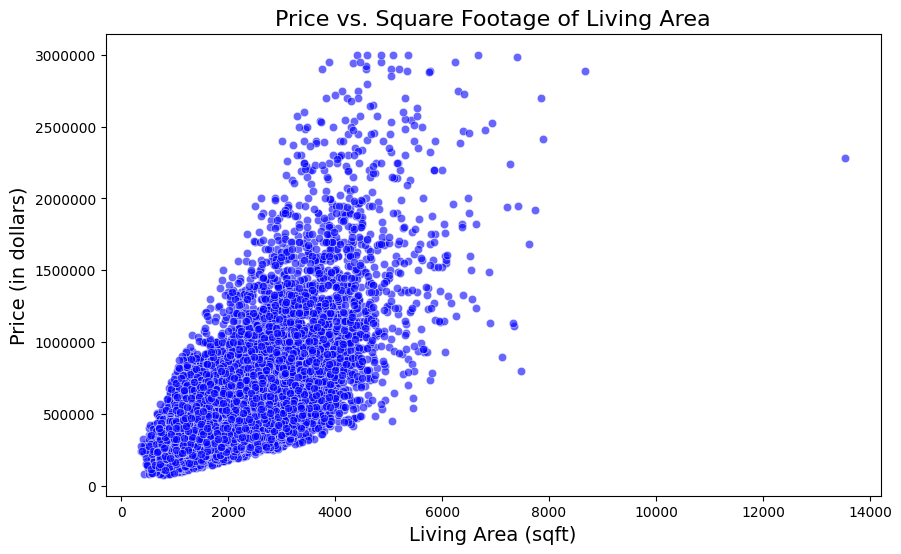

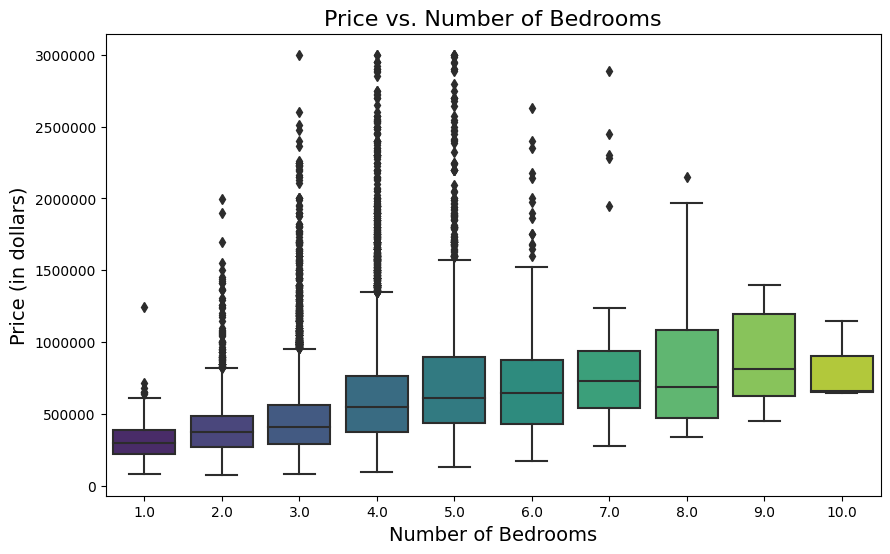

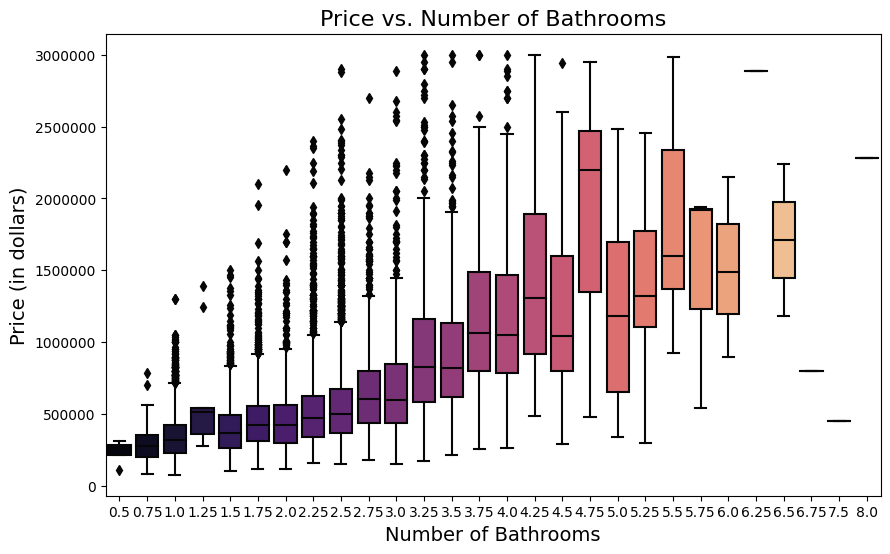

In [6]:
# Visualizing relationships between key features and price

# Scatterplot: Price vs. Square Footage of Living Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['sqft_living'], y=data['price'], alpha=0.6, color='blue')
plt.title('Price vs. Square Footage of Living Area', fontsize=16)
plt.xlabel('Living Area (sqft)', fontsize=14)
plt.ylabel('Price (in dollars)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')  # Ensures no scientific notation on the y-axis
plt.show()

# Scatterplot: Price vs. Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['bedrooms'], y=data['price'], palette='viridis')
plt.title('Price vs. Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price (in dollars)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')  # Ensures no scientific notation on the y-axis
plt.show()

# Scatterplot: Price vs. Number of Bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['bathrooms'], y=data['price'], palette='magma')
plt.title('Price vs. Number of Bathrooms', fontsize=16)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Price (in dollars)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')  # Ensures no scientific notation on the y-axis
plt.show()

Top correlations with 'price':
price            1.000000
sqft_living      0.691653
grade            0.680462
sqft_living15    0.601525
sqft_above       0.598026
bathrooms        0.519116
view             0.380845
lat              0.331904
bedrooms         0.322083
sqft_basement    0.302911
floors           0.270484
waterfront       0.203541
has_basement     0.182872
renovated        0.125135
sqft_lot         0.095162
sqft_lot15       0.086384
yr_built         0.053240
condition        0.040035
long             0.027193
date            -0.002392
id              -0.021410
zipcode         -0.047904
Name: price, dtype: float64


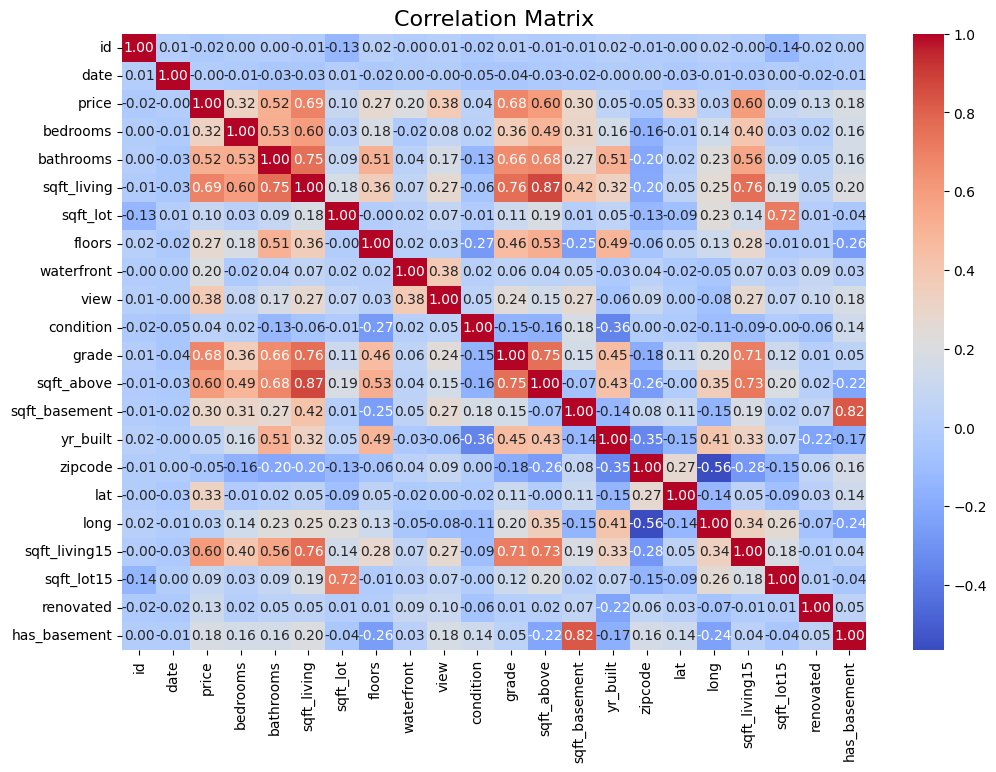

In [7]:
# Correlation analysis between numerical features and price

# Compute correlations
correlation_matrix = data.corr()

# Focusing on correlations with the target variable 'price'
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Displaying the top correlations with 'price'
print("Top correlations with 'price':")
print(price_correlations)

# Heatmap for the correlation matrix (optional, for visualization)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [8]:
# Feature Engineering

# Creating a price per square foot feature
data['price_per_sqft'] = data['price'] / data['sqft_living']

# Encoding 'waterfront' as a categorical feature
data['waterfront'] = data['waterfront'].astype('category')

# Combining latitude and longitude into a single feature (distance from a reference point)
# Using an arbitrary central point as reference 
reference_point = (data['lat'].mean(), data['long'].mean())
data['distance_from_center'] = ((data['lat'] - reference_point[0])**2 + (data['long'] - reference_point[1])**2)**0.5

# Normalizing 'sqft_living', 'grade', and 'bathrooms'
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['sqft_living', 'grade', 'bathrooms']] = scaler.fit_transform(data[['sqft_living', 'grade', 'bathrooms']])

# Dropping redundant or low-correlation features
data.drop(columns=['id', 'date', 'zipcode'], inplace=True)

# Verifying the updated dataset
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated,has_basement,price_per_sqft,distance_from_center
0,221900.0,3.0,0.066667,0.061503,5650,1.0,0,0,3,0.4,...,0,1955,47.5112,-122.257,1340,5650,0,0,188.050847,0.065046
1,538000.0,3.0,0.233333,0.167046,7242,2.0,0,0,3,0.4,...,400,1951,47.7210,-122.319,1690,7639,1,1,209.338521,0.192285
2,180000.0,2.0,0.066667,0.030372,10000,1.0,0,0,3,0.3,...,0,1933,47.7379,-122.233,2720,8062,0,0,233.766234,0.178965
3,604000.0,4.0,0.333333,0.120729,5000,1.0,0,0,5,0.4,...,910,1965,47.5208,-122.393,1360,5000,0,1,308.163265,0.183290
4,510000.0,3.0,0.200000,0.099468,8080,1.0,0,0,3,0.5,...,0,1987,47.6168,-122.045,1800,7503,0,0,303.571429,0.178248


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


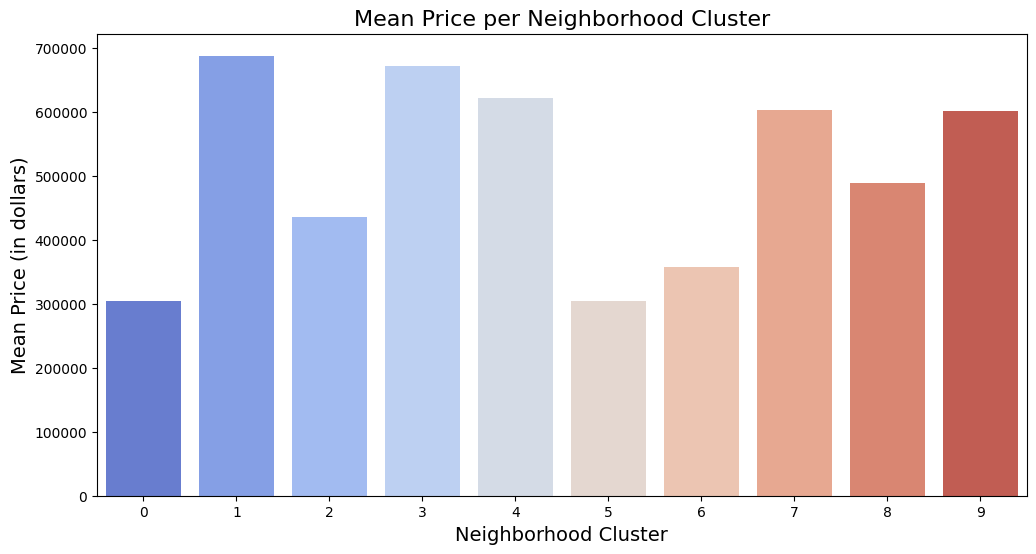

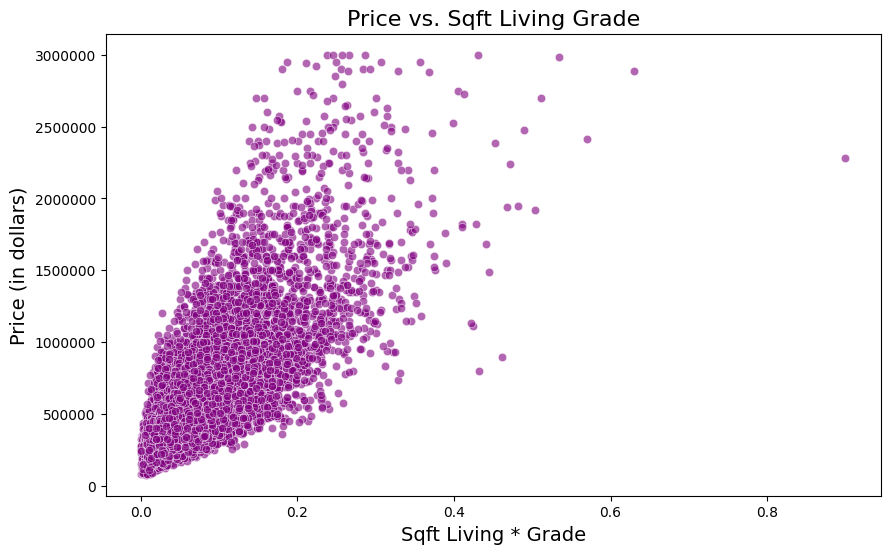

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


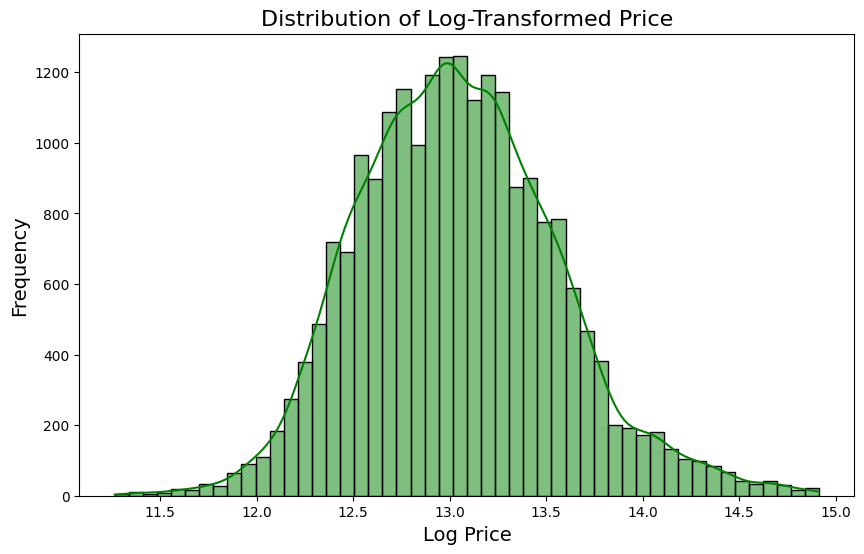

In [9]:
from sklearn.cluster import KMeans

# Clustering neighborhoods based on latitude and longitude
data['neighborhood_cluster'] = KMeans(n_clusters=10, random_state=42).fit_predict(data[['lat', 'long']])

# Calculating the mean price per cluster
data['mean_price_per_neighborhood'] = data.groupby('neighborhood_cluster')['price'].transform('mean')

# Combining `sqft_living` and `grade`
data['sqft_living_grade'] = data['sqft_living'] * data['grade']

# Applying log transformation
data['log_price'] = np.log1p(data['price'])  # Log transform with log(1 + price)
data['log_sqft_living'] = np.log1p(data['sqft_living'])

# Visualizing the new features

# Neighborhood Clusters vs. Mean Price
plt.figure(figsize=(12, 6))
sns.barplot(
    x=data['neighborhood_cluster'],
    y=data['mean_price_per_neighborhood'],
    palette='coolwarm'
)
plt.title('Mean Price per Neighborhood Cluster', fontsize=16)
plt.xlabel('Neighborhood Cluster', fontsize=14)
plt.ylabel('Mean Price (in dollars)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Scatterplot: Price vs. Sqft Living Grade (Interaction Feature)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['sqft_living_grade'], y=data['price'], alpha=0.6, color='purple')
plt.title('Price vs. Sqft Living Grade', fontsize=16)
plt.xlabel('Sqft Living * Grade', fontsize=14)
plt.ylabel('Price (in dollars)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Distribution of Log-Transformed Price
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], kde=True, bins=50, color='green')
plt.title('Distribution of Log-Transformed Price', fontsize=16)
plt.xlabel('Log Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Exploratory Data Analysis (EDA)

**Top Predictors:**

Features such as `sqft_living`, `grade`, `bathrooms`, and `price_per_sqft` strongly influence house prices.

**Geospatial Trends:** 

Neighborhood clustering and `distance_from_center` effectively captured location-based pricing dynamics.

**Price Distribution:**

Log transformation helped address skewness, improving model performance.


In [10]:
# Preparing the Data

# Defining the target variable and predictors
target = 'price'
predictors = [
    'sqft_living', 'grade', 'bathrooms', 'sqft_living_grade',
    'price_per_sqft', 'distance_from_center', 'mean_price_per_neighborhood'
]

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = data[predictors]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Step 2: Baseline Model - Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Training a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluating the Linear Regression model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression RMSE:", rmse)
print("Linear Regression R²:", r2)
print("Linear Regression MAE:", mae)

Training set size: 17240
Testing set size: 4310
Linear Regression RMSE: 109192.55425651521
Linear Regression R²: 0.8909361100998096
Linear Regression MAE: 63647.3487041636


In [11]:
# Advanced Models - Random Forest and Gradient Boosting
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)
print("Random Forest MAE:", rf_mae)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
gb_r2 = r2_score(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

print("Gradient Boosting RMSE:", gb_rmse)
print("Gradient Boosting R²:", gb_r2)
print("Gradient Boosting MAE:", gb_mae)

Random Forest RMSE: 22875.6432157741
Random Forest R²: 0.9952132410102446
Random Forest MAE: 4388.934661252901
Gradient Boosting RMSE: 28323.989647335122
Gradient Boosting R²: 0.9926615593400839
Gradient Boosting MAE: 14775.011058906714


In [12]:
#Step 4: Hyperparameter Tuning (Example for Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

# Step 5: Final Model Selection and Evaluation
from sklearn.metrics import mean_squared_log_error

best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)
best_rf_rmse = mean_squared_error(y_test, best_rf_pred, squared=False)
best_rf_r2 = r2_score(y_test, best_rf_pred)
best_rf_mae = mean_absolute_error(y_test, best_rf_pred)
best_rf_msle = mean_squared_log_error(y_test, best_rf_pred)

print("Final Random Forest Model RMSE:", best_rf_rmse)
print("Final Random Forest Model R²:", best_rf_r2)
print("Final Random Forest Model MAE:", best_rf_mae)
print("Final Random Forest Model MSLE:", best_rf_msle)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSE: 16546.21188975761
Final Random Forest Model RMSE: 23326.495708309383
Final Random Forest Model R²: 0.995022698672382
Final Random Forest Model MAE: 4287.637235112142
Final Random Forest Model MSLE: 0.0002746423851837604


# Model Performance
**Linear Regression**

Provided a baseline with an R² of 0.89 and RMSE of $109,192, but lacked the ability to handle non-linear relationships.

**Random Forest Regressor**

The best-performing model, achieving R² of 0.995 and RMSE of $22,875 (untuned) and $23,326 (tuned).

**Gradient Boosting Regressor** 

Competitive but lagged behind Random Forest, with R² of 0.993 and RMSE of $28,324.

## Implications and Usefulness

### **1. Accurate Pricing Predictions**
- Random Forest’s high accuracy makes it a reliable tool for predicting house prices and assisting in real estate decision-making.

### **2. Feature Insights for Improvements**
- Property upgrades (e.g., increasing living area or grade) can be guided by feature importance.
- Location insights enable targeting of high-value or undervalued neighborhoods.

### **3. Market Analysis**
- The models provide tools for analyzing market trends, identifying price clusters, and comparing predicted vs. market prices.

## Projections and Applications

### **1. Future Predictions**
- The model can predict prices for unseen properties or new regions with similar data after retraining.

### **2. Custom Tools**
- Develop interactive pricing tools for users to input features and obtain price predictions.

### **3. Investment Insights**
- Identify high ROI neighborhoods and simulate property improvements to analyze their impact on prices.


## **Final Thoughts**
This project demonstrates the ability to predict house prices accurately using advanced models like Random Forest. The insights can guide pricing strategies, inform investment decisions, and enable data-driven decision-making in real estate. Further refinements can enhance scalability and adaptability to new markets.
